In [ ]:
!nvidia-smi

Wed Sep 29 05:50:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
#Loading deep learning algorithm
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import keras
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMAGE_SIZE = [224,224]
CLASS=5
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = InceptionV3(weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
x = Flatten()(inception.output)
prediction = Dense(CLASS, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer = adam,
  metrics=['accuracy']
)
print("\n\n")
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_________________________________________________________________________________________

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/ECG/Split Dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Research/ECG/Split Dataset/val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/ECG/Split Dataset/test',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')
print("\n\n")
model.optimizer.get_config()

Found 1351 images belonging to 5 classes.
Found 384 images belonging to 5 classes.
Found 197 images belonging to 5 classes.





{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [ ]:
filepath = "/content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_val2.h5"
filepath2 = "/content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_train2.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint1,checkpoint2]
r = model.fit_generator(
    training_set,
    epochs=160,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)
model.save_weights("/content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/end2.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/160
43/43 [==============================] - 503s 11s/step - loss: 4.7941 - accuracy: 0.5811 - val_loss: 1.3607 - val_accuracy: 0.7760

Epoch 00001: val_accuracy improved from -inf to 0.77604, saving model to /content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_val2.h5

Epoch 00001: accuracy improved from -inf to 0.58105, saving model to /content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_train2.h5
Epoch 2/160
43/43 [==============================] - 70s 2s/step - loss: 1.6497 - accuracy: 0.7076 - val_loss: 1.2200 - val_accuracy: 0.7865

Epoch 00002: val_accuracy improved from 0.77604 to 0.78646, saving model to /content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_val2.h5

Epoch 00002: accuracy improved from 0.58105 to 0.70762, saving model to /content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_train2.h5
Epoch 3/160
43/43 [==============================] - 6

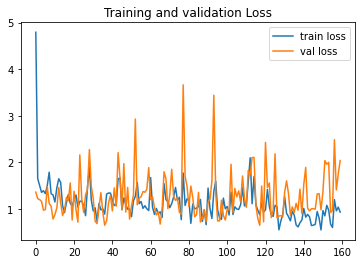

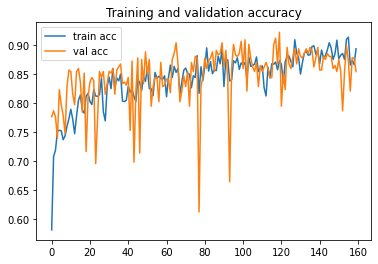

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#evaluating the model (test acc)
#batch size = 32
model.load_weights('/content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3/highest_val2.h5')
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 0.6884825825691223
Test Accuracy = 0.9086294174194336


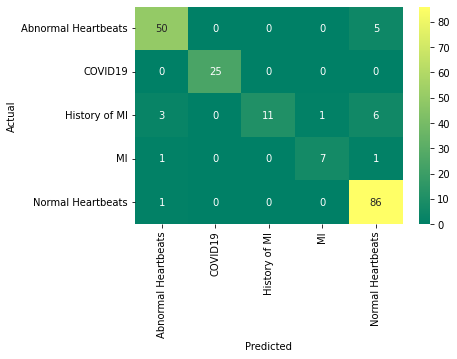

In [ ]:
#confusion matrix

#you have to set test bath size=1 before running the cell
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights('/content/drive/MyDrive/Research/ECG/Deep Learning /InceptionV3/InceptionV3_Adam_(0.001)/highest_val2.h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='summer', annot=True, fmt='d')
plt.show()
#plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')